In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as smt

In [3]:
#importing dataset
dataset = pd.read_csv('sign_mnist.csv')

#displaying first 5 rows of the dataset
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#shape of dataset (number of rows and columns present where each row is an example of )
dataset.shape

(27455, 785)

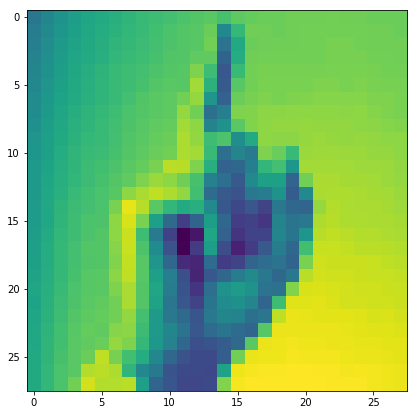

In [5]:
#visualizing a sample from the dataset
plt.figure(figsize=(7,7))
a = dataset.drop(axis=1, columns='label')
a = np.array(a[:1:])
plt.imshow(a.reshape(28,28))

In [6]:
#seperating features columns from dataset
features = pd.DataFrame(data = dataset.drop(axis=1, columns='label'))
features.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [7]:
#extracting target column from dataset
target = pd.DataFrame(dataset['label'])
target.head()

,label
0,3
1,6
2,2
3,2
4,13


In [44]:
#creating empty lists to further store model name and it's accuracy in 'model' and 'acc' respectively
model = list()
acc = list()

In [45]:
from sklearn.model_selection import train_test_split

#splitting dataset into training data and testing data respectively
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.33, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

#model 1 ----> Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_y = tree.predict(x_test)

#storing model name and it's accuracy
model.append('Decision Tree Classifier')
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

Accuracy Score :  0.8621564948681161


In [47]:
print("Classification Report for Decision Tree Classifier: \n",smt.classification_report(y_test,pred_y))

Classification Report for Decision Tree Classifier: 
              precision    recall  f1-score   support

          0       0.88      0.91      0.89       354
          1       0.83      0.89      0.86       302
          2       0.91      0.93      0.92       378
          3       0.83      0.90      0.87       407
          4       0.84      0.78      0.81       320
          5       0.89      0.88      0.89       407
          6       0.90      0.86      0.88       348
          7       0.84      0.87      0.85       339
          8       0.83      0.82      0.83       392
         10       0.86      0.81      0.83       373
         11       0.86      0.88      0.87       424
         12       0.79      0.83      0.81       362
         13       0.86      0.83      0.85       377
         14       0.92      0.91      0.92       400
         15       0.91      0.90      0.90       349
         16       0.93      0.90      0.92       436
         17       0.80      0.82      0.81  

In [48]:
from sklearn.ensemble import RandomForestClassifier

#model 2 ----> Random Forest Classifier (Entropy)
ranfor = RandomForestClassifier(criterion='entropy')
ranfor.fit(x_train,y_train)
pred_y = ranfor.predict(x_test)

#storing model name and it's accuracy
model.append("Random Forest Classifier (Entropy)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Score :  0.9739543096788434


In [49]:
print("Classification Report for Random Forest Classifier (Entropy): \n",smt.classification_report(y_test,pred_y))

Classification Report for Random Forest Classifier (Entropy): 
              precision    recall  f1-score   support

          0       0.95      0.99      0.97       354
          1       0.95      0.98      0.96       302
          2       0.99      1.00      1.00       378
          3       0.96      0.99      0.97       407
          4       0.97      0.97      0.97       320
          5       0.98      0.99      0.99       407
          6       0.97      0.98      0.98       348
          7       0.97      0.98      0.97       339
          8       0.95      0.97      0.96       392
         10       0.97      0.98      0.98       373
         11       0.99      0.98      0.98       424
         12       0.94      0.94      0.94       362
         13       0.97      0.94      0.95       377
         14       0.99      0.98      0.99       400
         15       0.99      0.99      0.99       349
         16       0.97      0.99      0.98       436
         17       0.96      0.96  

In [50]:
#model 3 ----> Random Forest Classifier (gini)
ranfor = RandomForestClassifier(criterion='gini')
ranfor.fit(x_train,y_train)
pred_y = ranfor.predict(x_test)

#storing model name and it's accuracy
model.append("Random Forest Classifier (Gini)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score :  0.9725195894492882


In [51]:
print("Classification Report for Random Forest Classifier (Gini) : \n",smt.classification_report(y_test,pred_y))

Classification Report for Random Forest Classifier (Gini) : 
              precision    recall  f1-score   support

          0       0.94      0.99      0.97       354
          1       0.95      0.99      0.97       302
          2       0.98      0.99      0.99       378
          3       0.97      0.98      0.97       407
          4       0.95      0.97      0.96       320
          5       0.98      0.99      0.98       407
          6       0.97      0.98      0.97       348
          7       0.98      0.96      0.97       339
          8       0.98      0.96      0.97       392
         10       0.95      0.98      0.96       373
         11       0.98      0.98      0.98       424
         12       0.96      0.96      0.96       362
         13       0.97      0.94      0.96       377
         14       0.99      0.97      0.98       400
         15       0.98      1.00      0.99       349
         16       0.98      0.99      0.99       436
         17       0.96      0.97    

In [52]:
#applying PCA before training with SVC
from sklearn.decomposition import PCA

#reducing features from 784 to 200 features
pca = PCA(n_components=200)
pca.fit(features)
x_new = pca.transform(features)
x_new.shape

(27455, 200)

In [53]:
#splitting dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x_new,target, test_size=0.33, random_state=42)

In [54]:
from sklearn.svm import SVC

In [55]:
#model 4 ----> SVM (linear)
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
pred_y = svc.predict(x_test)

#storing model name and it's accuracy
model.append("SVM (Linear)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("SVM when Kernel = 'LINEAR':-\n")
print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM when Kernel = 'LINEAR':-

Accuracy Score :  1.0


In [56]:
print("Classification Report for SVM (linear) : \n",smt.classification_report(y_test,pred_y))

Classification Report for SVM (linear) : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       354
          1       1.00      1.00      1.00       302
          2       1.00      1.00      1.00       378
          3       1.00      1.00      1.00       407
          4       1.00      1.00      1.00       320
          5       1.00      1.00      1.00       407
          6       1.00      1.00      1.00       348
          7       1.00      1.00      1.00       339
          8       1.00      1.00      1.00       392
         10       1.00      1.00      1.00       373
         11       1.00      1.00      1.00       424
         12       1.00      1.00      1.00       362
         13       1.00      1.00      1.00       377
         14       1.00      1.00      1.00       400
         15       1.00      1.00      1.00       349
         16       1.00      1.00      1.00       436
         17       1.00      1.00      1.00       432
  

In [57]:
#model 5 ----> SVM (gaussian)
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
pred_y = svc.predict(x_test)

model.append("SVM (Gaussian)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("SVM when Kernel = 'GAUSSIAN':-\n")
print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM when Kernel = 'GAUSSIAN':-

Accuracy Score :  0.15826067762940074


In [58]:
print("Classification Report for SVM (gaussian) : \n",smt.classification_report(y_test,pred_y))

Classification Report for SVM (gaussian) : 
              precision    recall  f1-score   support

          0       1.00      0.09      0.16       354
          1       1.00      0.08      0.15       302
          2       1.00      0.13      0.23       378
          3       1.00      0.12      0.22       407
          4       1.00      0.08      0.16       320
          5       1.00      0.09      0.17       407
          6       1.00      0.17      0.29       348
          7       1.00      0.12      0.21       339
          8       1.00      0.11      0.20       392
         10       1.00      0.10      0.18       373
         11       1.00      0.14      0.25       424
         12       1.00      0.07      0.12       362
         13       1.00      0.12      0.21       377
         14       1.00      0.11      0.20       400
         15       1.00      0.14      0.25       349
         16       1.00      0.16      0.28       436
         17       0.05      1.00      0.10       432


In [59]:
#list of models and their accuracies
model_acc =pd.DataFrame(data=list(zip(model,acc)),columns=('Models','Accuracy'))
model_acc

,Models,Accuracy
0,Decision Tree Classifier,86.215649
1,Random Forest Classifier (Entropy),97.395431
2,Random Forest Classifier (Gini),97.251959
3,SVM (Linear),100.000000
4,SVM (Gaussian),15.826068


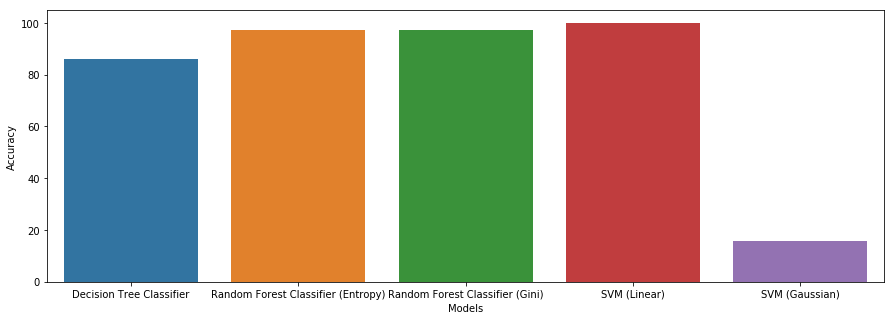

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=model_acc,x='Models',y='Accuracy')

# Conclusion : 
By analysing the above graph, it is clear that SVM(linear) helps in attaining the maximum accuracy of 100% for the given dataset